In [1]:
import numpy as np

from experiment_utils import run_experiment_with_coordinate_masking, prepare_glove, plot_chosen_results


In [2]:
masked_coord_counts = [8, 10, 12]
prepare_glove(25, masked_coord_counts, True)

Prepare glove-25 data
compute test scores for models with masked coordinates


In [3]:
results_recall_5 = run_experiment_with_coordinate_masking(
    "glove_25", 25, masked_coord_counts, recall_top_len=5,
    n_search_threads=8, recalc_graphs=False, verbose=True
)

In [4]:
results_recall_1 = run_experiment_with_coordinate_masking(
    "glove_25", 25, masked_coord_counts, recall_top_len=1,
    n_search_threads=8, recalc_graphs=False, verbose=True
)

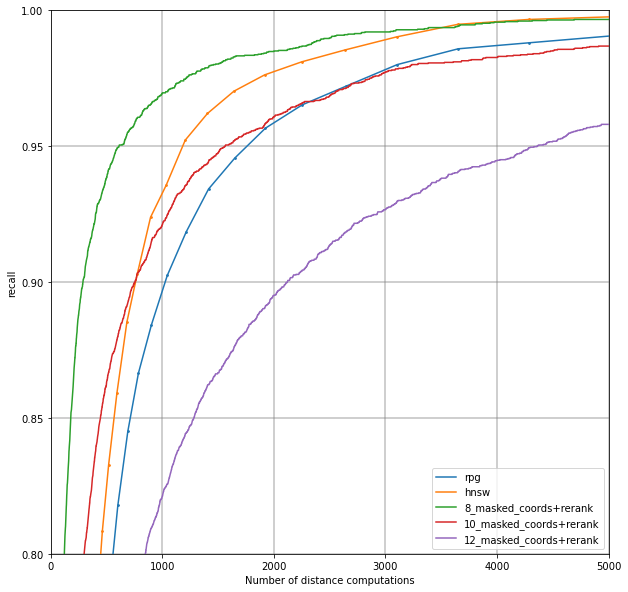

In [10]:
plot_chosen_results(
    results_recall_5, keys=[
        "rpg", "hnsw",
        '8_masked_coords+rerank',
        '10_masked_coords+rerank',
        '12_masked_coords+rerank'
    ],
    xlim=(0, 5000), ylim=(0.8, 1),
    hlines=np.linspace(0.8, 1, 5),
    vlines=np.linspace(0, 5000, 6)
)

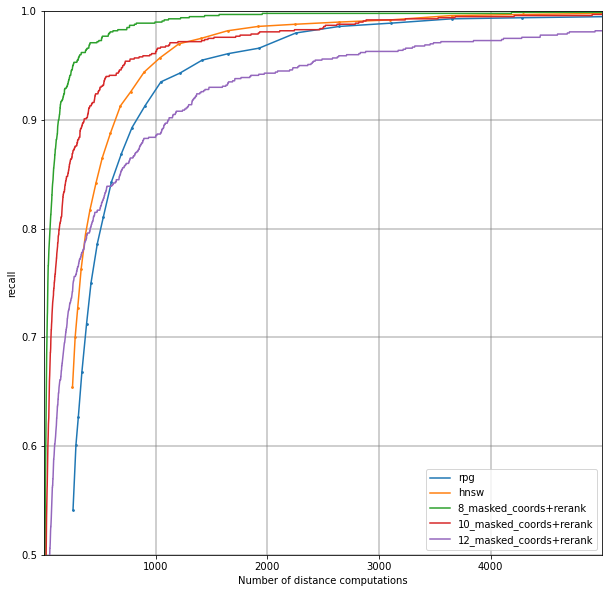

In [8]:
plot_chosen_results(
    results_recall_1, keys=[
        "rpg", "hnsw",
        '8_masked_coords+rerank',
        '10_masked_coords+rerank',
        '12_masked_coords+rerank'
    ],
    xlim=(0, 5000), ylim=(0.5, 1),
    hlines=np.linspace(0.5, 1, 6),
    vlines=np.linspace(1000, 4000, 4)
)